In [2]:
from tabpfn import TabPFNClassifier
from linformer import Linformer

In [3]:
tpfn = TabPFNClassifier()
model = tpfn.model[2]
print(model)

TransformerModel(
  (transformer_encoder): TransformerEncoderDiffInit(
    (layers): ModuleList(
      (0-11): 12 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=1024, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
        (linear2): Linear(in_features=1024, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.0, inplace=False)
        (dropout2): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (encoder): Linear(in_features=100, out_features=512, bias=True)
  (y_encoder): Linear(in_features=1, out_features=512, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): GELU(approximate='none')

In [4]:
num_heads = model.transformer_encoder.layers[0].self_attn.num_heads 
embed_dim = model.transformer_encoder.layers[0].self_attn.embed_dim
lin_enc = Linformer(
    dim=embed_dim,
    seq_len=1000,
    depth=12,
    k=16,
    heads=num_heads,
    one_kv_head=True,
    share_kv=True,
)

model.transformer_encoder =lin_enc
print(model)

TransformerModel(
  (transformer_encoder): Linformer(
    (net): SequentialSequence(
      (layers): ModuleList(
        (0-11): 12 x ModuleList(
          (0): PreNorm(
            (fn): LinformerSelfAttention(
              (to_q): Linear(in_features=512, out_features=512, bias=False)
              (to_k): Linear(in_features=512, out_features=128, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
              (to_out): Linear(in_features=512, out_features=512, bias=True)
            )
            (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          )
          (1): PreNorm(
            (fn): FeedForward(
              (w1): Linear(in_features=512, out_features=2048, bias=True)
              (act): GELU(approximate='none')
              (dropout): Dropout(p=0.0, inplace=False)
              (w2): Linear(in_features=2048, out_features=512, bias=True)
            )
            (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          )


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/Users/breenda/Desktop/Finetunig-TabPFN/tabpfn.csv")

In [7]:
df

,Model,Dataset,Inference Time,Inference Accuracy
0,RF,Iris,0.0830,0.947
1,DT,Iris,0.0013,0.921
2,T_Full,Iris,0.9210,0.947
3,T_lin_32,Iris,0.1760,0.916
4,T_lin_16,Iris,0.1500,0.830
5,T_lin_16 + GANs,Iris,0.1183,0.166
6,T_lin_16 + RAGs,Iris,0.1080,0.330


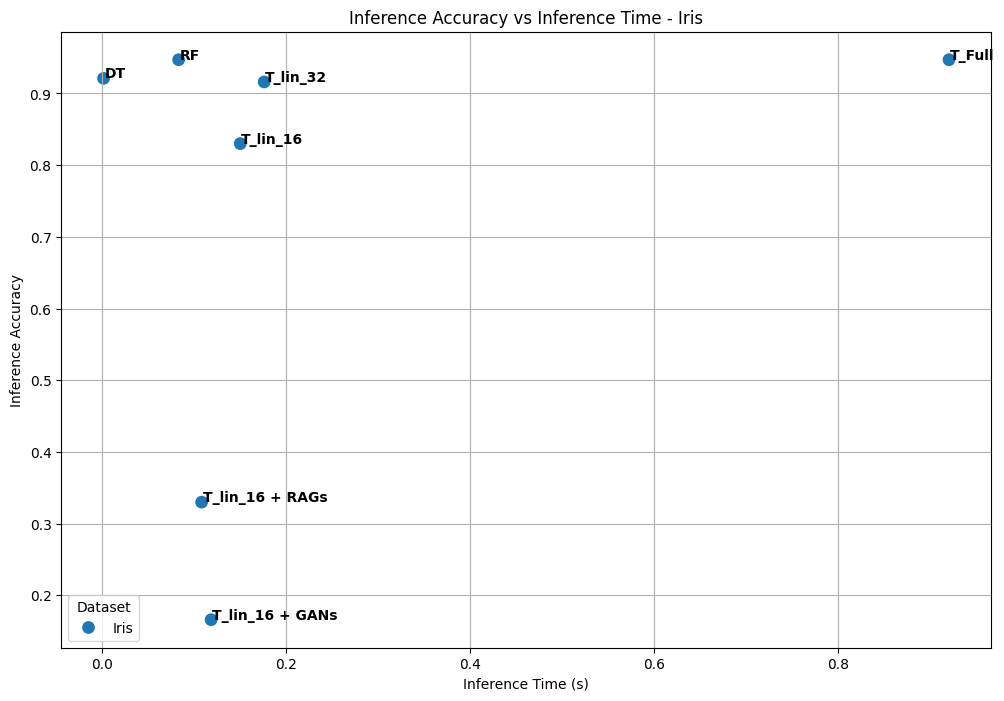

In [8]:
# Plotting
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=df, x='Inference Time', y='Inference Accuracy', hue='Dataset', style='Dataset', s=100)
# Define the offset value
x_offset = 0.001  # Adjust this value as needed
y_offset = 0.001 # Adjust this value as needed

for i in range(len(df)):
    plt.text(df['Inference Time'][i] + x_offset, df['Inference Accuracy'][i] + y_offset, df['Model'][i], 
             horizontalalignment='left', 
             size='medium', color='black', weight='semibold')  # Adjust fontsize and alignment as needed

plt.title('Inference Accuracy vs Inference Time - Iris')
plt.xlabel('Inference Time (s)')
plt.ylabel('Inference Accuracy')
plt.legend(title='Dataset')
plt.grid(True)
plt.show()
